In [1]:
# 캐글에서 데이터 받아오면 됨

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Image

warnings.filterwarnings('ignore')

SEED = 34

In [3]:
import tensorflow_datasets as tfds
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'd4rl_adroit_door',
 'd4rl_adroit_hammer',
 'd4rl_adroit_pen',
 'd4rl_adroit_relocate',
 'd4rl_mujoco_ant',
 'd4

In [43]:
# celeba_small 데이터 살펴보기
celeba_small = np.load('./celeba_small.npz')
x = celeba_small['train_images'][1]
y = celeba_small['train_labels'][1]


In [44]:
x.shape, y.shape

((72, 59, 3), (2,))

[1 1]


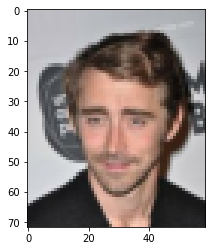

In [45]:
plt.imshow(x)
print(y)

In [46]:
# 학습데이터 훈련 데이터 만들기

train_images = celeba_small['train_images']
train_labels = celeba_small['train_labels']
test_images = celeba_small['test_images']
test_labels = celeba_small['test_labels']

In [47]:
print(train_images.shape, test_images.shape)

(2000, 72, 59, 3) (200, 72, 59, 3)


In [48]:
# 이미지에서 0이 아닌 값을 출력

train_images[train_images != 0][:10]

array([0.02352941, 0.04313725, 0.05490196, 0.01960784, 0.03921569,
       0.05490196, 0.01977401, 0.03921569, 0.05114656, 0.02352941])

In [49]:
train_images.dtype

dtype('float64')

In [50]:
# 이미지 데이터 범위 확인
print(train_images.shape, test_images.shape)
print(train_images.dtype, test_images.dtype)

print(train_images[train_images != 0][:10])
print(train_labels[train_labels != 0][:10])

(2000, 72, 59, 3) (200, 72, 59, 3)
float64 float64
[0.02352941 0.04313725 0.05490196 0.01960784 0.03921569 0.05490196
 0.01977401 0.03921569 0.05114656 0.02352941]
[1 1 1 1 1 1 1 1 1 1]


In [51]:
print(train_labels.min(), train_labels.max())

0 1


In [52]:
print(train_images.min(), train_images.max())

0.0 1.0


In [53]:
print(train_labels.shape)

(2000, 2)


In [54]:
train_labels  # ska

array([[0, 0],
       [1, 1],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=int8)

In [55]:
#성별 (남,여), 웃(웃음, 안웃음)

from tensorflow.keras.utils import to_categorical
train_male_labels , train_smile_labels = np.split(train_labels,2,axis = 1)
test_male_labels,test_smile_labels = np.split(test_labels, 2, axis = 1)

In [56]:
print(train_male_labels.shape)
print

(2000, 1)


<function print>

In [57]:
train_male_labels = to_categorical(train_male_labels)
train_smile_labels = to_categorical(train_smile_labels)

test_male_labels = to_categorical(test_male_labels)
test_smile_labels = to_categorical(test_smile_labels)

In [59]:
train_male_labels

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [58]:
print(train_male_labels.shape)
print(train_smile_labels.shape)
print(test_male_labels.shape)
print(test_smile_labels.shape)

(2000, 2)
(2000, 2)
(200, 2)
(200, 2)


In [60]:
train_labels2 = np.concatenate([train_male_labels, train_smile_labels], axis = 1)

In [61]:
train_labels2   # 남성여부, 웃음여부

array([[1., 0., 1., 0.],
       [0., 1., 0., 1.],
       [0., 1., 1., 0.],
       ...,
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.]], dtype=float32)

In [63]:
test_labels2 = np.concatenate([test_male_labels, test_smile_labels], axis = 1)

In [64]:
print(train_labels2.shape, test_labels2.shape)

(2000, 4) (200, 4)


# 시각화


In [71]:
train_images[:5].shape

(5, 72, 59, 3)

In [73]:
np.hstack(train_images[:5]).shape


(72, 295, 3)

[[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 1.]]


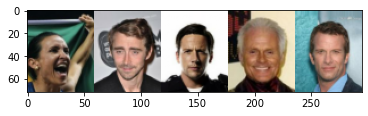

In [69]:
plt.imshow(np.hstack(train_images[:5]))
plt.show
print(train_labels2[:5])

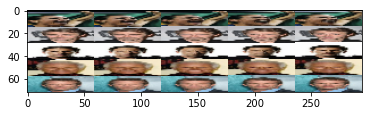

In [82]:
# transpose 사용해서 출력하기

plt.imshow(train_images[:5].transpose((0,1,2,3)).reshape((72,-1,3)))

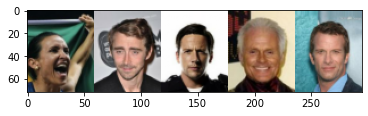

In [74]:
# transpose 사용해서 출력하기

plt.imshow(train_images[:5].transpose((1,0,2,3)).reshape((72,-1,3)))

In [84]:
for i, label in enumerate(zip(train_male_labels, train_smile_labels)):
    if i == 5:
        break
    print(label)

(array([1., 0.], dtype=float32), array([1., 0.], dtype=float32))
(array([0., 1.], dtype=float32), array([0., 1.], dtype=float32))
(array([0., 1.], dtype=float32), array([1., 0.], dtype=float32))
(array([0., 1.], dtype=float32), array([0., 1.], dtype=float32))
(array([0., 1.], dtype=float32), array([0., 1.], dtype=float32))


gender  smile
0       0        499
        1        507
1       0        504
        1        490
dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


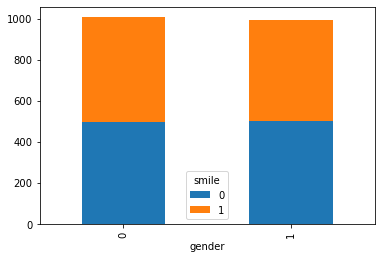

In [85]:
# smile male 각각 몇개 있는지
df = pd.DataFrame(train_labels, columns = ['gender','smile'])
print(df.groupby(['gender','smile']).size())
print(df.groupby(['gender','smile']).size().unstack().plot(kind ='bar', stacked = True))

# 모델링

In [88]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Input, Flatten, Dense

In [91]:
def simple_model():
    inputs = Input((72,59,3))
    
    x = Conv2D(64,3,activation = 'relu')(inputs)
    x = MaxPool2D(2)(x)
    x = Conv2D(32,3,activation = 'relu')(x)
    x = MaxPool2D(2)(x)
    x = Conv2D(32,3,activation = 'relu')(x)
    x = MaxPool2D(2)(x)
    
    x = Flatten()(x)
    x = Dense(32,activation = 'relu')(x)
    
    outputs = Dense(2,activation = 'softmax')(x)
    model = Model(inputs,outputs)
    
    return model

In [92]:
# 2개의 모델을 할당받고 summary 해보기
gender_model = simple_model()
smile_model = simple_model()

gender_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 72, 59, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 57, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 26, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 5, 32)          0     

In [93]:
# 모델 설정
gender_model.compile(loss= 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [94]:
smile_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [97]:
# 만든 모델에 train_images 학습

gender_hist = gender_model.fit(train_images, train_male_labels,
               validation_data = (test_images,test_male_labels), epochs = 15, verbose
                               = 1)

Train on 2000 samples, validate on 200 samples
Epoch 1/15
2000/2000 [==============================] - 28s 14ms/sample - loss: 0.6191 - acc: 0.6795 - val_loss: 0.5750 - val_acc: 0.7400
Epoch 2/15
2000/2000 [==============================] - 27s 14ms/sample - loss: 0.5056 - acc: 0.7555 - val_loss: 0.5495 - val_acc: 0.7550
Epoch 3/15
2000/2000 [==============================] - 27s 14ms/sample - loss: 0.4383 - acc: 0.8020 - val_loss: 0.4664 - val_acc: 0.8150
Epoch 4/15
2000/2000 [==============================] - 27s 14ms/sample - loss: 0.3830 - acc: 0.8255 - val_loss: 0.3954 - val_acc: 0.8500
Epoch 5/15
2000/2000 [==============================] - 28s 14ms/sample - loss: 0.2758 - acc: 0.8810 - val_loss: 0.3154 - val_acc: 0.9000
Epoch 6/15
2000/2000 [==============================] - 29s 14ms/sample - loss: 0.2224 - acc: 0.9025 - val_loss: 0.2721 - val_acc: 0.9200
Epoch 7/15
2000/2000 [==============================] - 29s 14ms/sample - loss: 0.1810 - acc: 0.9285 - val_loss: 0.2695 - val

In [98]:
smile_hist = smile_model.fit(train_images,train_smile_labels,
                            validation_data = (test_images,test_smile_labels),epochs = 15, verbose = 1)

Train on 2000 samples, validate on 200 samples
Epoch 1/15
2000/2000 [==============================] - 31s 15ms/sample - loss: 0.6927 - acc: 0.5395 - val_loss: 0.6892 - val_acc: 0.5900
Epoch 2/15
2000/2000 [==============================] - 30s 15ms/sample - loss: 0.6853 - acc: 0.5470 - val_loss: 0.6759 - val_acc: 0.5800
Epoch 3/15
2000/2000 [==============================] - 30s 15ms/sample - loss: 0.6384 - acc: 0.6445 - val_loss: 0.6085 - val_acc: 0.6750
Epoch 4/15
2000/2000 [==============================] - 30s 15ms/sample - loss: 0.5275 - acc: 0.7435 - val_loss: 0.4461 - val_acc: 0.7850
Epoch 5/15
2000/2000 [==============================] - 30s 15ms/sample - loss: 0.3893 - acc: 0.8355 - val_loss: 0.3247 - val_acc: 0.8600
Epoch 6/15
2000/2000 [==============================] - 31s 15ms/sample - loss: 0.3309 - acc: 0.8620 - val_loss: 0.2984 - val_acc: 0.8850
Epoch 7/15
2000/2000 [==============================] - 31s 15ms/sample - loss: 0.2936 - acc: 0.8775 - val_loss: 0.2976 - val

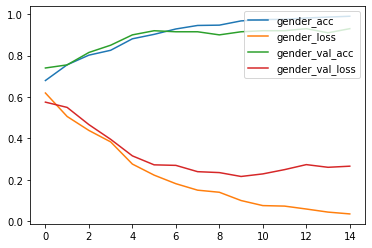

In [101]:
# 학습 진행 사항을 plt 로 출력하기

plt.plot(gender_hist.history['acc'], label = 'gender_acc')
plt.plot(gender_hist.history['loss'], label = 'gender_loss')
plt.plot(gender_hist.history['val_acc'], label = 'gender_val_acc')
plt.plot(gender_hist.history['val_loss'],label = 'gender_val_loss')

plt.legend(loc = 'upper right')
plt.show()

In [110]:
# 완성된 모델 테스트
gender_res = gender_model.predict(test_images[1:2])
smile_res = smile_model.predict(test_images[1:2])

print("성별 예측 :",gender_res)
print("정답:",test_male_labels[1:2])
print(smile_res)
print(test_smile_labels[1:2])

성별 예측 : [[9.9995506e-01 4.4885768e-05]]
정답: [[1. 0.]]
[[0.97661793 0.02338202]]
[[1. 0.]]


# 멀티 아웃풋 모델링

In [111]:
from tensorflow.keras.layers import Concatenate


In [114]:
def multi_model1():
    inputs = Input((72,59,3))
    x = Conv2D(64,3,activation = 'relu')(inputs)
    x = MaxPool2D(2)(x)
    x = Conv2D(32,3,activation = 'relu')(x)
    x = MaxPool2D(2)(x)
    x = Conv2D(32,3,activation = 'relu')(x)
    x = MaxPool2D(2)(x)
    
    x = Flatten()(x)
    x = Dense(32,activation = 'relu')(x)
    
    gender_outputs = Dense(2,activation = 'softmax')(x)
    smile_outputs = Dense(2,activation = 'softmax')(x)
    
    outputs = Concatenate(axis = 1)([smile_outputs, gender_outputs])
    model = Model(inputs, outputs)
    #Model(inputs, [gender_outputs, smile_outputs])
    return model

In [115]:
model = multi_model1()
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 72, 59, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 70, 57, 64)   1792        input_5[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_10 (MaxPooling2D) (None, 35, 28, 64)   0           conv2d_10[0][0]                  
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 33, 26, 32)   18464       max_pooling2d_10[0][0]           
____________________________________________________________________________________________

In [116]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics =['acc'])

In [117]:
# 학습
hist = model.fit(train_images, train_labels2, validation_data = (test_images, test_labels2),epochs = 15, verbose = 1)

Train on 2000 samples, validate on 200 samples
Epoch 1/15
2000/2000 [==============================] - 28s 14ms/sample - loss: 2.7138 - acc: 0.4840 - val_loss: 2.6352 - val_acc: 0.6100
Epoch 2/15
2000/2000 [==============================] - 27s 14ms/sample - loss: 2.5701 - acc: 0.6620 - val_loss: 2.5795 - val_acc: 0.6950
Epoch 3/15
2000/2000 [==============================] - 28s 14ms/sample - loss: 2.4480 - acc: 0.6760 - val_loss: 2.4037 - val_acc: 0.6400
Epoch 4/15
2000/2000 [==============================] - 29s 14ms/sample - loss: 2.3037 - acc: 0.6880 - val_loss: 2.2361 - val_acc: 0.6600
Epoch 5/15
2000/2000 [==============================] - 30s 15ms/sample - loss: 2.0603 - acc: 0.6760 - val_loss: 2.1661 - val_acc: 0.6200
Epoch 6/15
2000/2000 [==============================] - 30s 15ms/sample - loss: 1.9414 - acc: 0.6590 - val_loss: 2.0839 - val_acc: 0.5950
Epoch 7/15
2000/2000 [==============================] - 30s 15ms/sample - loss: 1.8573 - acc: 0.6325 - val_loss: 2.0389 - val

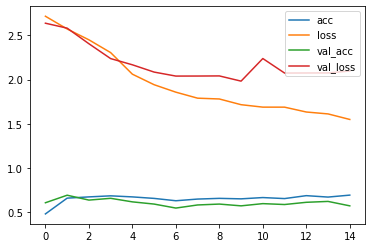

In [120]:
# 학습 결과 그래프로 나타내기
plt.plot(hist.history['acc'],label = 'acc')
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_acc'],label = 'val_acc')
plt.plot(hist.history['val_loss'],label = 'val_loss')
plt.legend(loc = 'upper right')
plt.show()

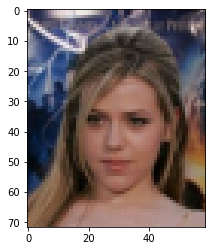

In [121]:
plt.imshow(test_images[1])

In [123]:
train_labels2[1]  # 남, 여 , 웃, 안웃

array([0., 1., 0., 1.], dtype=float32)

In [132]:
res =model.predict(test_images[1:2])

print(res[0][0])

0.9995714


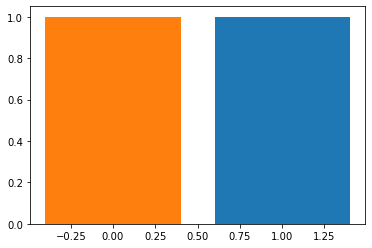

In [136]:
plt.bar(np.array(range(2)),res[0][0])
plt.bar(np.array(range(2)), test_male_labels[1])
plt.show()